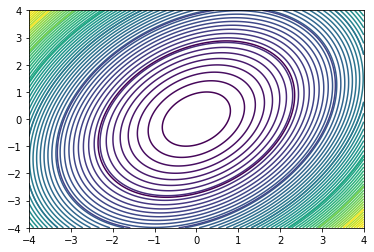

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

x_min, y_min = -4.0 , -4.0
x_max, y_max = 4.0, 4.0

def f(params):
    x,y = params
    return (1/2)*x**2 + (1/3)*y**2 - (1/4)*x*y

x_min, x_max = -4, 4
y_min, y_max = -4, 4                   

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

x,y = np.meshgrid(nx,ny)
z = f([x,y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)
plt.show()

In [19]:


x0 = x_min + np.random.random()*(x_max - x_min)
y0 = y_min + np.random.random()*(y_max - y_min)

def Gradient(f, x, y, d):
    arg = np.array([x,y])
    dx = np.array([x+d,y])
    dy = np.array([x,y+d])
    a = (f(dx) - f(arg))/d
    b = (f(dy) - f(arg))/d
    return np.array([a,b])

def GradDescent(a, b, N=1000):
    x_prev = None
    x_now = np.array([a, b])
    converged = False
    for i in range(N):
        if x_prev is None:
            d = 0.1
        else:
            df = Gradient(f,x_now[0],x_now[1],0.1) - Gradient(f, x_prev[0], x_prev[1],0.1)
            dx = x_now - x_prev
            d = (np.dot(dx, df))/(np.dot(df,df))
        x_next = x_now - d * Gradient(f, x_now[0], x_now[1],0.1)
        
        if f(x_next) < f(x_now):
            x_prev = x_now
            x_now = x_next

        else:
            converged = True
            break
    return converged, x_now, f(x_now), i

converged, x_best, f_min, i = GradDescent(x0,y0)
print('(x_0, y_0): ', np.array([x0,y0]), '   converged: ', converged, '   Best solution: x=', x_best, 'f=', f_min, 'cycles:', i)

(x_0, y_0):  [3.52513496 0.24141246]    converged:  True    Best solution: x= [-0.06082336 -0.05707105] f= 0.0020676288047241746 cycles: 4


In [20]:
x0 = x_min + np.random.random()*(x_max - x_min)
y0 = y_min + np.random.random()*(y_max - y_min)

converged, x_best, f_min, i = GradDescent(x0,y0)
print('(x_0, y_0): ', np.array([x0,y0]), '   converged: ', converged, '   Best solution: x=', x_best, 'f=', f_min, 'cycles:', i)

(x_0, y_0):  [-0.43619221  1.05156956]    converged:  True    Best solution: x= [-0.05974559 -0.06272709] f= 0.002159413677784912 cycles: 4


In [22]:
'''
Using SciPy
'''
from scipy.optimize import minimize

res = minimize(f, [x0,y0], method='BFGS', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 16
         Gradient evaluations: 4


In [24]:
res = minimize(f, [x0,y0], method='nelder-mead', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 84


In [26]:
res = minimize(f, [x0,y0], method='CG', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 28
         Gradient evaluations: 7


In [28]:
res = minimize(f, [x0,y0], method='powell', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 64
